<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Assignment6/Assignment6_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### Loading data from CIFAR10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


### Display pictures of different classes

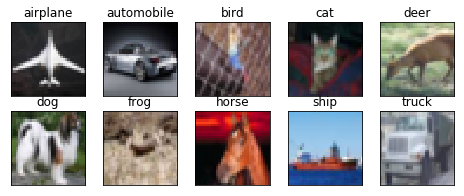

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Drawing model accuracy(Train vs Validation) and model loss(Train vs Valisation) from model execution history

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Calculating accuracy of a model from the input dataset and model

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Pixel normalization and using hot encoding converting the output labels into hot encoding values for train and test dataset

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### First model which uses Relu activation, Max pooling, dropout and Dense Layer

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

### First model summary

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

### Running the model for 10 epochs and saving the best model by taking validation accuracy into account, then load the best model. Draw graph of train vs validation accuracy and train vs validation loss and then whats the best validation score of this model

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 15s 39ms/step - loss: 1.8533 - acc: 0.2925 - val_loss: 1.5158 - val_acc: 0.4398

Epoch 00001: val_acc improved from -inf to 0.43980, saving model to assignment6_model_A-1.h5
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3481 - acc: 0.5117 - val_loss: 1.1216 - val_acc: 0.5970

Epoch 00002: val_acc improved from 0.43980 to 0.59700, saving model to assignment6_model_A-1.h5
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1287 - acc: 0.6018 - val_loss: 0.9779 - val_acc: 0.6533

Epoch 00003: val_acc improved from 0.59700 to 0.65330, saving model to assignment6_model_A-1.h5
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9968 - acc: 0.6492 - val_loss: 0.8983 - val_acc: 0.6858

Epoch 00004: val_acc improved from 0.65330 to 0.68580, saving model to assignment6_model_A-1.h5
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.

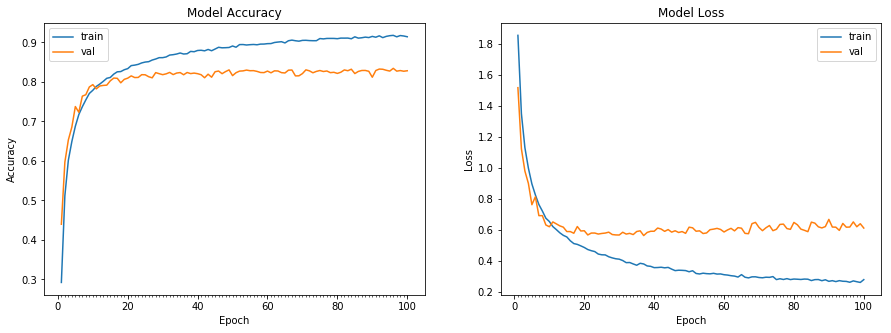

Accuracy on test data is: 83.44


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)
checkpointer = ModelCheckpoint(filepath='assignment6_model_A-1.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
# Load the weights with the best validation accuracy:
model.load_weights('assignment6_model_A-1.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Objective, improve the model accuracy from the last model without using Dense Layer and less than 100 epochs

### New Model, without using Dense Layer and added dropout where needed and introduced batch normalization.

### Finally, drawing the model train vs validation accuracy and train vs validation loss

In [0]:
# Define the model
new_model = Sequential()
new_model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
new_model.add(Activation('relu'))#32
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(64, 3, 3))
new_model.add(Activation('relu'))#30
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(MaxPooling2D(pool_size=(2, 2)))#15
new_model.add(Convolution2D(32, 1, activation='relu')) # Reducing channel size to 32

new_model.add(Convolution2D(64, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#15
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(128, 3, 3))
new_model.add(Activation('relu'))#13

new_model.add(MaxPooling2D(pool_size=(2, 2)))#6
new_model.add(Convolution2D(32, 1, activation='relu')) # Reducing channel size to 32

new_model.add(Convolution2D(64, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#6
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(128, 3, 3))
new_model.add(Activation('relu'))#4x4
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(32, 1, 1, activation='relu')) # Reducing channel size to 32
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(num_classes, 4, 4))#1
new_model.add(Flatten())
new_model.add(Activation('softmax'))

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))

In [0]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_38 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 30, 30, 64)        256       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=74)`
  del sys.path[0]


Epoch 1/74
390/390 [==============================] - 18s 46ms/step - loss: 1.7640 - acc: 0.3702 - val_loss: 1.6630 - val_acc: 0.4145

Epoch 00001: val_acc improved from -inf to 0.41450, saving model to assignment6_model_A-2.h5
Epoch 2/74
390/390 [==============================] - 15s 39ms/step - loss: 1.2831 - acc: 0.5380 - val_loss: 1.4918 - val_acc: 0.4913

Epoch 00002: val_acc improved from 0.41450 to 0.49130, saving model to assignment6_model_A-2.h5
Epoch 3/74
390/390 [==============================] - 15s 39ms/step - loss: 1.0649 - acc: 0.6190 - val_loss: 1.1379 - val_acc: 0.5960

Epoch 00003: val_acc improved from 0.49130 to 0.59600, saving model to assignment6_model_A-2.h5
Epoch 4/74
390/390 [==============================] - 15s 39ms/step - loss: 0.9311 - acc: 0.6689 - val_loss: 1.0435 - val_acc: 0.6348

Epoch 00004: val_acc improved from 0.59600 to 0.63480, saving model to assignment6_model_A-2.h5
Epoch 5/74
390/390 [==============================] - 15s 39ms/step - loss: 0.8

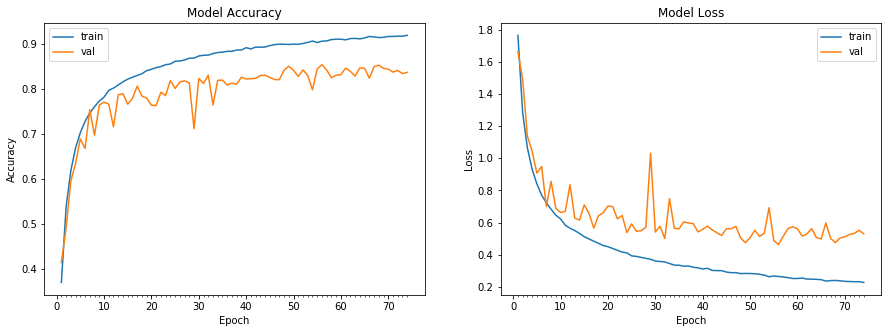

Accuracy on test data is: 85.41


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)
checkpointer = ModelCheckpoint(filepath='assignment6_model_A-2.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')

# train the model
start = time.time()
# Train the model
new_model_info = new_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 74, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(new_model_info)
# compute test accuracy
# Load the weights with the best validation accuracy:
new_model.load_weights('assignment6_model_A-2.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, new_model))

#### The old model accuracy was: 83.44, and the new model accuracy is 85.41

